In [229]:
from torchtext.data import get_tokenizer
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import spacy

from torchtext.vocab import build_vocab_from_iterator
%matplotlib inline 


In [230]:
if torch.cuda.is_available():
    print("CUDA is available. Training on GPU.")
else:   
    print("CUDA is not available. Training on CPU.")

CUDA is available. Training on GPU.


In [231]:
if torch.cuda.is_available():
    torch.set_default_device('cuda')

In [232]:
tokenizer = get_tokenizer("basic_english")

# Open the file and read the contents
with open('data/war_and_peace.txt', 'r') as file:
    content = file.read() 
    
tokens = tokenizer(content)

In [233]:
# eng = spacy.load("en_core_web_sm")
# 
# FILE_PATH = 'data/war_and_peace.txt'


In [234]:
# build the vocabulary of characters and mappings to/from integers
words = sorted(list(set(tokens)))
stoi = {s:i for i,s in enumerate(words)}
itos = {i:s for s,i in stoi.items()}

In [235]:
stoi

{'!': 0,
 '(': 1,
 ')': 2,
 '*': 3,
 '*catherine': 4,
 '*do': 5,
 '*kutúzov': 6,
 '*poisonous': 7,
 '*—as': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '000': 12,
 '07': 13,
 '1': 14,
 '10': 15,
 '100': 16,
 '102': 17,
 '10—annette': 18,
 '11': 19,
 '110': 20,
 '12': 21,
 '120': 22,
 '13': 23,
 '130': 24,
 '13th': 25,
 '140': 26,
 '15': 27,
 '15/4': 28,
 '150': 29,
 '15y': 30,
 '160': 31,
 '17': 32,
 '178': 33,
 '1789': 34,
 '1797': 35,
 '17th': 36,
 '18': 37,
 '1805': 38,
 '1805-6': 39,
 '1806': 40,
 '1807': 41,
 '1808': 42,
 '1809': 43,
 '1809—precede': 44,
 '1810': 45,
 '1811': 46,
 '1812': 47,
 '1812—the': 48,
 '1812—though': 49,
 '1813': 50,
 '1813—salute': 51,
 '1815': 52,
 '1820': 53,
 '18th': 54,
 '1st': 55,
 '2': 56,
 '20': 57,
 '217': 58,
 '22': 59,
 '22nd': 60,
 '23': 61,
 '23rd': 62,
 '24': 63,
 '24th': 64,
 '25': 65,
 '25th': 66,
 '26': 67,
 '27': 68,
 '27th': 69,
 '3': 70,
 '30': 71,
 '31': 72,
 '3rd': 73,
 '4': 74,
 '40': 75,
 '4th': 76,
 '4x': 77,
 '5': 78,
 '50': 79,
 '6': 80,
 '

In [236]:
len(stoi)

21731

In [237]:
# build the dataset

# context length: how many characters we take to predict the next one
block_size = 3

X, Y = [], []

context = [0] * block_size

for token in tokens:
    ix = stoi[token]
    X.append(context)
    Y.append(ix)
    # print(", ".join(itos[i] for i in context), "--->", itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [238]:
occurrences = {}

for token in tokens:
    if stoi[token] in occurrences:
        occurrences[stoi[token]] += 1
    else:
        occurrences[stoi[token]] = 1

In [239]:
sorted_occurrences = sorted(occurrences.items(), key=lambda item: item[1], reverse=True)
sorted_occurrences

[(9, 39744),
 (17993, 34127),
 (11, 30659),
 (736, 21745),
 (18297, 16552),
 (12375, 14852),
 (101, 10351),
 (8322, 9668),
 (9118, 8837),
 (21712, 8611),
 (8592, 7957),
 (17982, 7697),
 (19733, 7322),
 (20108, 5633),
 (8135, 5351),
 (9707, 5031),
 (8416, 4695),
 (12156, 4598),
 (8523, 4566),
 (1226, 4497),
 (12449, 3958),
 (1128, 3945),
 (0, 3925),
 (2460, 3664),
 (7097, 3465),
 (16153, 3361),
 (8884, 3295),
 (20392, 3257),
 (9690, 3232),
 (100, 3135),
 (15530, 2834),
 (566, 2697),
 (7379, 2664),
 (1600, 2414),
 (19886, 2405),
 (2492, 2373),
 (18064, 2086),
 (19987, 2069),
 (18124, 2010),
 (12451, 2004),
 (19939, 2001),
 (19910, 1982),
 (8306, 1943),
 (13838, 1867),
 (16665, 1789),
 (13275, 1779),
 (722, 1613),
 (19181, 1550),
 (18005, 1512),
 (12525, 1503),
 (1661, 1474),
 (4871, 1469),
 (19924, 1453),
 (18003, 1437),
 (18041, 1364),
 (20251, 1350),
 (11176, 1263),
 (12469, 1263),
 (1013, 1224),
 (12620, 1223),
 (12199, 1216),
 (12096, 1174),
 (8912, 1156),
 (11805, 1135),
 (3964, 111

In [240]:
X.shape, Y.shape

(torch.Size([650138, 3]), torch.Size([650138]))

In [241]:
C = torch.randn(21732, 2)

# because we use a block size of 3, the shape of the input layer will be 2*3 (embedding size * context size)
W1 = torch.randn((6, 1000))
b1 = torch.randn(1000)
W2 = torch.randn((1000, 21732))
b2 = torch.randn(21732)

parameters = [C, W1, b1, W2, b2]

In [242]:
emb = C[X]
emb.shape

torch.Size([650138, 3, 2])

In [243]:
s = 0
for p in parameters:
    print(p.nelement())
    s += p.nelement()
    
print(f'sum of parameters: {s}')

43464
6000
1000
21732000
21732
sum of parameters: 21804196


In [244]:
for p in parameters:
    p.requires_grad = True

In [245]:
# exponentiated learning rate
ex_steps = 1000
lre = torch.linspace(-3, 0, ex_steps)
lrs = 10**lre

In [246]:
lri = []
lossi = []

for i in range(ex_steps):

    # minibatch construct 
    ix = torch.randint(0, X.shape[0], (32, ))

    emb = C[X[ix]] 
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None    
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i].detach().cpu().numpy())
    lossi.append(loss.item())

109.13211822509766
110.12210845947266
99.93375396728516
102.2949447631836
108.27179718017578
111.29149627685547
106.17729949951172
101.92383575439453
104.87542724609375
110.21255493164062
114.84162139892578
117.35765075683594
105.74893951416016
105.72103881835938
111.9576644897461
102.28341674804688
109.47004699707031
103.89849090576172
99.92779541015625
110.36066436767578
104.52183532714844
108.92350769042969
102.49016571044922
104.84716796875
111.25421142578125
107.81442260742188
104.82572174072266
101.45747375488281
106.65837860107422
116.2955322265625
104.58179473876953
113.49287414550781
110.94773864746094
111.68120574951172
97.31716918945312
103.90950775146484
103.06272888183594
105.57888793945312
105.15943908691406
111.99980163574219
119.66693878173828
106.3000259399414
105.11790466308594
104.37450408935547
113.99513244628906
103.23606872558594
117.76221466064453
106.84584045410156
98.02120208740234
115.66136169433594
100.85236358642578
106.6759033203125
101.58160400390625
108.1

Text(0, 0.5, 'Loss')

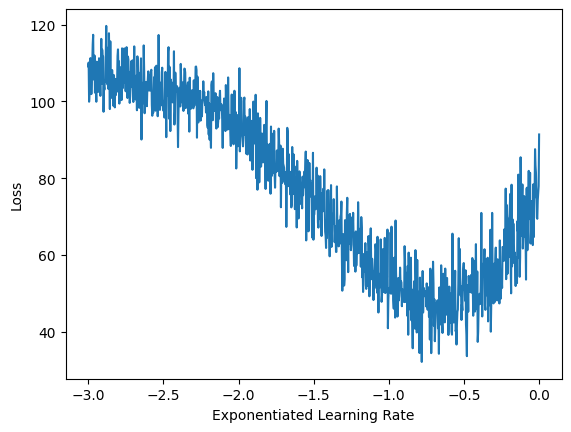

In [247]:
plt.plot(lri, lossi)
plt.xlabel('Exponentiated Learning Rate')
plt.ylabel('Loss')

In [248]:
10 ** -0.75

0.1778279410038923

In [249]:
lossi = []
stepi = []

for i in range(1000):

    # minibatch construct 
    ix = torch.randint(0, X.shape[0], (32, ))

    emb = C[X[ix]] 
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None    
    loss.backward()
    
    lr = 0.1
    
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())
    

80.0070571899414
81.42352294921875
78.80908966064453
71.7024154663086
74.64275360107422
63.63132095336914
75.99500274658203
82.55827331542969
77.01922607421875
66.16209411621094
62.31678771972656
71.07380676269531
78.86604309082031
66.883056640625
67.99777221679688
64.29625701904297
67.3626480102539
64.75856018066406
60.91120147705078
70.90928649902344
64.34326934814453
63.67560958862305
70.77430725097656
65.17343139648438
65.02114868164062
69.18923950195312
62.09918975830078
70.16730499267578
75.25627899169922
65.8861312866211
69.01114654541016
65.6058120727539
62.14566421508789
55.460628509521484
55.85432434082031
62.77215576171875
77.372314453125
49.74402618408203
56.63423156738281
53.69352722167969
50.656410217285156
49.019065856933594
53.2763671875
51.20808029174805
59.32547378540039
58.779296875
48.71868133544922
61.8308219909668
42.13172149658203
52.33964920043945
57.46815872192383
61.42366409301758
50.252525329589844
53.23598861694336
58.954654693603516
52.25334548950195
45.525

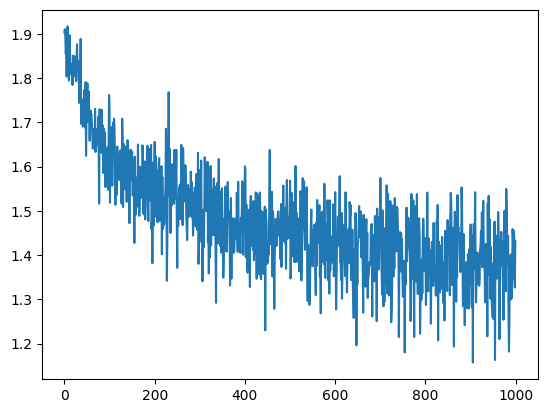

In [250]:
plt.plot(stepi, lossi)

In [251]:
C.shape

torch.Size([21732, 2])

In [252]:
display_no = 200

most_common_tokens = [i[0] for i in sorted_occurrences[:display_no]]

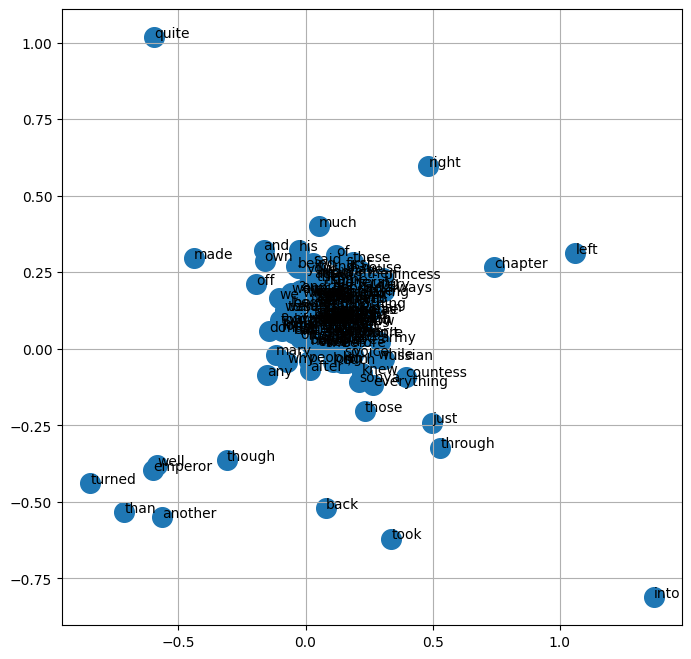

In [253]:
plt.figure(figsize=(8, 8))

# Move the tensors to CPU and convert to numpy for plotting
scatter_x = C[most_common_tokens, 0].cpu().data.numpy()
scatter_y = C[most_common_tokens, 1].cpu().data.numpy()

plt.scatter(scatter_x, scatter_y, s=display_no)
for i in most_common_tokens:
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i])
plt.grid("minor")

In [254]:
for _ in range(10):

    out = []
    context = [11] * block_size  # initialize with all ...
    for i in range(10):
        emb = C[torch.tensor([context])]  # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()

        context = context[1:] + [ix]

        out.append(ix)


    print(' '.join(itos[i] for i in out))

it other protecting french out prospect , that imprudent .
. princess rouged witness came knouted his his excellency .
it hand as infringe of dispersed village—“and succeeding things dark-haired
had sónya military , deméntyev of . enter . mortal
. self-justifications arab half-dozen attracted away chin paces prince gallicism
look other sónya of with of countess seen his pit
eyes kutúzov conversing reply tack desire 1st expression expression it
of you look on again they what later . knows
. then look look women no conducted of exactions of
on ” companies of out confiding . . left gravity


In [255]:
prompt = "it seems that"

for _ in range(10):
    
    context_words = prompt.split(" ")
    context = [stoi[i] for i in context_words]
    
    out = []
    for i in range(10):
        emb = C[torch.tensor([context])]  # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()

        context = context[1:] + [ix]

        out.append(ix)


    print(' '.join(itos[i] for i in out))

. now is ? all face vainly . pathetically chimney
or fling . disks gods bazaars belying rear . position
. after am cherry head . . it sónya was
voice or like . suddenly princess say though oudinot’s on
or ball of busy shook midwinter lit tactless hinting expression
vight . . . princess was look usual of serve
without time do did prince out women without on pierre
of over it slice pointer scent oratory uneasiness it interjected
regard seclusion , fuss unsolicited “listen conclude life—the coexisting matter—that’s
more life . more not two ( ” what not
